# Image Downloader

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'pick_up_trucks'
file = 'pick_up_trucks.txt'

In [3]:
folder = 'semi_trucks'
file = 'semi_truck.txt'

In [4]:
folder = 'sedan_cars'
file = 'sedan_car.txt'

In [5]:
path = Path('data')
dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

# Download Images

In [6]:
#download_images(path/file, dest, max_pics=200)

In [7]:
classes = ['pick_up_trucks','semi_trucks','sedan_cars']

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

pick_up_trucks


/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


semi_trucks


sedan_cars


/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [9]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224)

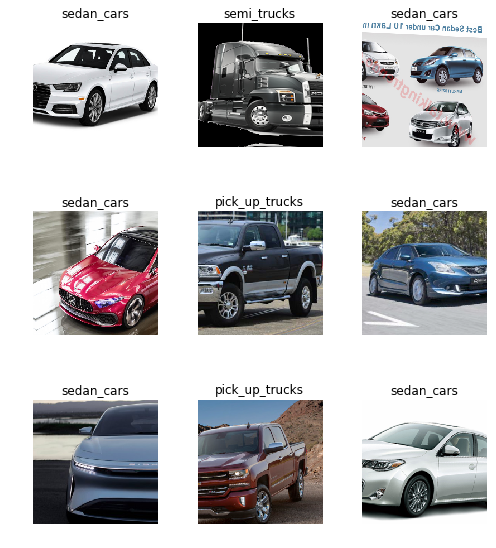

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c

(['pick_up_trucks', 'sedan_cars', 'semi_trucks'], 3)

# Train Model

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

Total time: 00:59
epoch  train_loss  valid_loss  error_rate
1      0.993068    0.242412    0.037037    (00:15)
2      0.655585    0.086680    0.046296    (00:13)
3      0.472654    0.068270    0.027778    (00:14)
4      0.379996    0.059714    0.018519    (00:14)



In [14]:
learn.save('stage-1')


In [15]:
learn.unfreeze()


In [16]:
learn.lr_find()


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


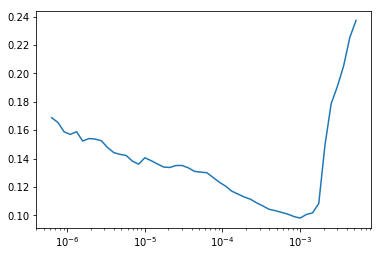

In [17]:
learn.recorder.plot()


In [18]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))


Total time: 00:30
epoch  train_loss  valid_loss  error_rate
1      0.167626    0.055027    0.018519    (00:14)
2      0.128578    0.056052    0.018519    (00:15)



In [19]:
learn.save('stage-2')

# Interpretation

In [20]:
interp = ClassificationInterpretation.from_learner(learn)


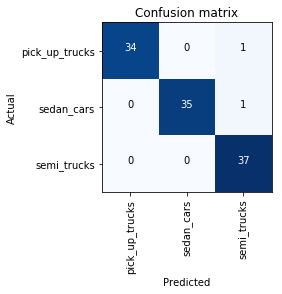

In [21]:
interp.plot_confusion_matrix()


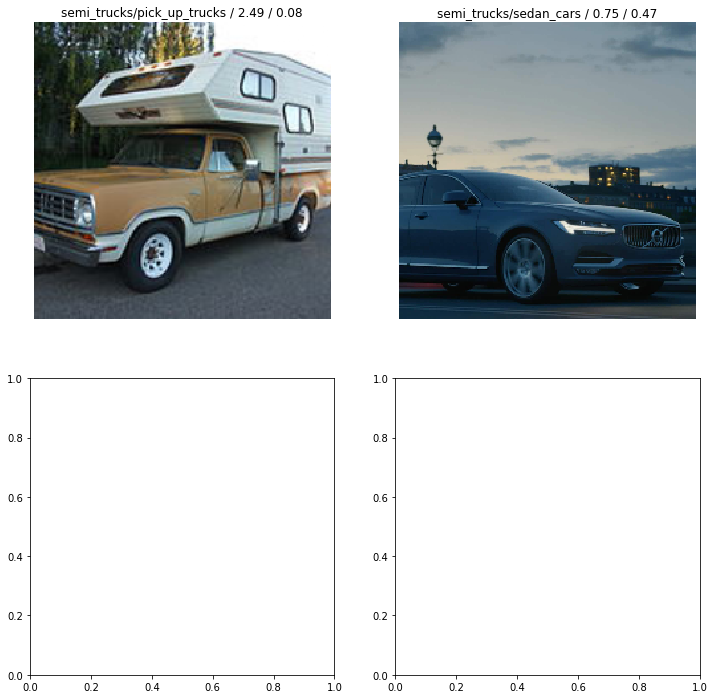

In [22]:
interp.plot_top_losses(2)
